In [1]:
from __future__ import division
from shapely.geometry import mapping
import matplotlib.colors as pltc
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
import rioxarray as xr
import matplotlib.pyplot as plt
import rasterio
import pandas as pd
import numpy as np
import os

%matplotlib inline
#plt.rcParams['figure.figsize'] = [10, 10] # figire sizes

In [3]:
# import phenopy
#os.chdir('/home/javierlopatin/Documentos/GitHub/PhenoPY/')
#import phenopy
os.chdir('/home/javierlopatin/Documents/temp/WetlandPhenology/')

In [4]:
# get phenological shape of the wetlands

days1 = '/home/javier/Documents/SF_delta/Sentinel/TSA/X-004_Y-001/dates.txt'
days2 = '/home/javier/Documents/SF_delta/Sentinel/TSA/X-003_Y-001/dates.txt'
dates1 = pd.read_csv(days1, header=None)[0]
dates1 = pd.to_datetime(dates1)
dates2 = pd.read_csv(days2, header=None)[0]
dates2 = pd.to_datetime(dates2)

inData1 = '/home/javier/Documents/SF_delta/Sentinel/TSA/X-004_Y-001/2015-2019_001-365_LEVEL4_TSA_SEN2L_EVI_C0_S0_FAVG_TY_C95T_TSS.tif'
inData2 = '/home/javier/Documents/SF_delta/Sentinel/TSA/X-003_Y-001/2015-2019_001-365_LEVEL4_TSA_SEN2L_EVI_C0_S0_FAVG_TY_C95T_TSS.tif'

FileNotFoundError: [Errno 2] No such file or directory: '/home/javier/Documents/SF_delta/Sentinel/TSA/X-004_Y-001/dates.txt'

## Get shapefiles

In [4]:
# Open and dissolve to CalVegName
shp = gpd.read_file("SHP/Suisun.shp")
#shp = shp.dissolve(by="CalVegName")
#shp.to_file("SHP/Suisun_diss_CalVeg.shp")

In [5]:
shp

,OBJECTID,NVCSName,NVCSLevel,MapClass,MapClassCo,Original_2,Original_1,Cov_2015,Dist_2015,Ht_2015,...,CaCode,NVCSAllian,NVCSGroup,NVCSMG,UID,Acres,Hectares,Shape_Leng,Shape_Area,geometry
0,1.0,Distichlis spicata - Juncus arcticus var. balt...,Association,Distichlis spicata - Juncus arcticus var. balt...,8111203,Distichlis spicata-Juncus balticus Association,145,25-50%,Not evident,0.5-1m,...,41.200.05,Distichlis spicata,Temperate Pacific tidal salt and brackish meadow,North American Pacific Coastal Salt Marsh,SUMA00001,0.790708,0.319988,391.468421,3199.511517,"POLYGON ((-170073.545 12482.965, -170063.403 1..."
1,2.0,Phragmites australis,Alliance,Phragmites australis Herbaceous Alliance,7111400,Phragmites australis Association,103,25-50%,Medium,2-5m,...,41.061.00,Phragmites australis,Arid West freshwater emergent marsh,Western North American Freshwater Marsh,SUMA00002,5.140611,2.080332,1510.143278,20800.909695,"POLYGON ((-169921.839 12310.479, -169918.260 1..."
2,3.0,"Juncus arcticus (var. balticus, mexicanus)",Alliance,"Juncus arcticus (var. balticus, mexicanus) Her...",7131100,Juncus balticus Association,132,10-25%,Not evident,0.5-1m,...,45.562.00,"Juncus arcticus (var. balticus, mexicanus)",Californian warm temperate marsh/seep,Western North America Wet Meadow and Low Shrub...,SUMA00003,5.624506,2.276157,1631.768194,22758.990159,"POLYGON ((-170282.126 12944.321, -170271.381 1..."
3,4.0,Barren,NaN,Bare Ground Mapping Unit,1,Bare Ground mu,1,2-10%,Not evident,<0.5m,...,NaN,NaN,NaN,NaN,SUMA00004,1.008580,0.408158,489.626308,4081.251382,"POLYGON ((-173408.506 19548.208, -173408.573 1..."
4,5.0,Barren,NaN,Bare Ground Mapping Unit,1,Bare Ground mu,1,2-10%,Not evident,0.5-1m,...,NaN,NaN,NaN,NaN,SUMA00005,0.553421,0.223962,371.596264,2239.435470,"POLYGON ((-172471.152 19438.779, -172468.211 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29029,29030.0,Mediterranean California Naturalized Annual an...,Group,Mediterranean California Naturalized Annual an...,4111000,Mediterranean CA naturalized annual and perenn...,227,25-50%,High,0.5-1m,...,NaN,NaN,Mediterranean California naturalized annual an...,California Annual and Perennial Grassland,SUMA29030,137.073532,67.685867,13277.537272,554659.301048,"POLYGON ((-166804.828 15033.100, -166708.532 1..."
29030,29031.0,Mediterranean California Naturalized Annual an...,Group,Mediterranean California Naturalized Annual an...,4111000,Mediterranean CA naturalized annual and perenn...,227,25-50%,High,0.5-1m,...,NaN,NaN,Mediterranean California naturalized annual an...,California Annual and Perennial Grassland,SUMA29031,1.321005,67.685867,891.830857,5345.390982,"POLYGON ((-166903.957 15344.641, -166879.412 1..."
29031,29032.0,Mediterranean California Naturalized Annual an...,Group,Mediterranean California Naturalized Annual an...,4111000,Mediterranean CA naturalized annual and perenn...,227,25-50%,High,0.5-1m,...,NaN,NaN,Mediterranean California naturalized annual an...,California Annual and Perennial Grassland,SUMA29032,26.850929,67.685867,4906.208452,108651.407841,"POLYGON ((-166712.865 16369.529, -166710.229 1..."
29032,29033.0,Distichlis spicata - Juncus arcticus var. balt...,Association,Distichlis spicata - Juncus arcticus var. balt...,8111203,Distichlis spicata-Juncus balticus Association,145,25-50%,Not evident,0.5-1m,...,41.200.05,Distichlis spicata,Temperate Pacific tidal salt and brackish meadow,North American Pacific Coastal Salt Marsh,SUMA29033,1.020334,0.366053,425.668136,4128.712512,"POLYGON ((-165103.921 14533.499, -165097.595 1..."


In [6]:
# add new column and reclassify
shp["PFT"] = 0
shp.PFT[shp.CalVegName.isin(["Saltbush", "Pickleweed-Cordgrass"])] = "Pickleweed-Cordgrass-Saltbush"
shp.PFT[shp.CalVegName.isin(["Tule-Cattail"])] = "Tule-Cattail"
shp.PFT[shp.CalVegName.isin(["Wet Meadows"])] = "Wet Meadows"
#shp.PFT[shp.CalVegName.isin(["Annual Grasses and Forbs"])] = "Annual Grassland"
shp.PFT[shp.CalVegName.isin(["Annual Grasses and Forbs","Perennial Grasses and Forbs", "Non-Native/Invasive Grass"])] = "Grassland"
shp.PFT[shp.CalVegName.isin(["Coast Live Oak", "Coyote Brush", "Eucalyptus", "Non-Native/Ornamental Shrub", "North Coastal Scrub", "Non-Native/Ornamental Hardwood",
                            "Riparian Mixed Shrub", "Baccharis (Riparian)", "Tamarisk"])] = "Other"
# not to be included in all analysis
shp.PFT[shp.CalVegName.isin(["Urban or Developed, Urban-related", "Urban or Developed, Urban-Related Bare Soil"])] = "Urban or developed"
shp.PFT[shp.CalVegName.isin(["Agriculture"])] = "Agriculture"
shp.PFT[shp.CalVegName.isin(["Water", "Water, Bays or Estuaries", "Developed Water Feature"])] = "Water"
shp.PFT[shp.CalVegName.isin(["Barren"])] = "Barren"
shp.PFT[shp.CalVegName.isin(["Willow", "Willow (Shrub)"])] = "Willow"

/tmp/ipykernel_2758/2618578225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shp.PFT[shp.CalVegName.isin(["Saltbush", "Pickleweed-Cordgrass"])] = "Pickleweed-Cordgrass-Saltbush"


In [7]:
shp.PFT.unique()

array(['Pickleweed-Cordgrass-Saltbush', 'Tule-Cattail', 'Wet Meadows',
       'Barren', 'Grassland', 'Water', 'Other', 'Urban or developed',
       'Agriculture', 'Willow'], dtype=object)

In [10]:
# Dissolve shapefile according to PFT
pft = shp.dissolve(by="PFT")
#pft.to_file("SHP/Suisun_PFT_diss.shp")

In [11]:
pft.head()

,geometry,OBJECTID,NVCSName,NVCSLevel,MapClass,MapClassCo,Original_2,Original_1,Cov_2015,Dist_2015,...,Rare,CaCode,NVCSAllian,NVCSGroup,NVCSMG,UID,Acres,Hectares,Shape_Leng,Shape_Area
PFT,,,,,,,,,,,,,,,,,,,,,
Agriculture,"MULTIPOLYGON (((-186218.535 21591.579, -186316...",5127.0,Row and Close Grain Crop,Formation,Row and Close Grain Crop Formation,9311000,Cultivated Annual Graminoid mu,225,N/A,N/A,...,None,None,None,None,None,SUMA05127,8.772331,3.550037,1396.592914,35497.125425
Barren,"MULTIPOLYGON (((-185023.987 7827.246, -185025....",4.0,Barren,None,Bare Ground Mapping Unit,1,Bare Ground mu,1,2-10%,Not evident,...,None,None,None,None,None,SUMA00004,1.008580,0.408158,489.626308,4081.251382
Grassland,"MULTIPOLYGON (((-186527.072 5561.795, -186528....",10.0,Mediterranean California Naturalized Annual an...,Group,Mediterranean California Naturalized Annual an...,4111000,Mediterranean CA naturalized annual and perenn...,227,25-50%,Low,...,N,42.051.02,Phalaris aquatica,Mediterranean California naturalized annual an...,California Annual and Perennial Grassland,SUMA00010,1.051968,0.425717,431.385943,4256.796506
Other,"MULTIPOLYGON (((-186402.752 6942.680, -186401....",14.0,Baccharis pilularis / Annual Grass-Herb,Association,Baccharis pilularis / Annual Grass-Herb Associ...,6111101,Baccharis pilularis /Annual Grasses Association,603,25-50%,Low,...,N,32.060.20,Baccharis pilularis,California Coastal evergreen bluff and dune scrub,Vancouverian Coastal Dune and Bluff,SUMA00014,0.466919,0.188956,288.399041,1889.354629
Pickleweed-Cordgrass-Saltbush,"MULTIPOLYGON (((-186238.104 7169.147, -186229....",1.0,Distichlis spicata - Juncus arcticus var. balt...,Association,Distichlis spicata - Juncus arcticus var. balt...,8111203,Distichlis spicata-Juncus balticus Association,145,25-50%,Not evident,...,N,41.200.05,Distichlis spicata,Temperate Pacific tidal salt and brackish meadow,North American Pacific Coastal Salt Marsh,SUMA00001,0.790708,0.319988,391.468421,3199.511517


In [12]:
# load Suisun area
#susun = gpd.read_file('SHP/Suisun_diss.shp')
# load PFT vegetation classes
suisunPFT = gpd.read_file('SHP/Suisun_PFT_diss.shp')
#suisun = suisun.to_crs(suisunPFT.crs)
# delate Agriculture, Anual Grasess and Forbs, and Eucapyptus
#shp = suisunPFT.drop([0, 5])
#shp2 = suisunPFT.iloc[[0, 5]]
# load example areas
area = gpd.read_file('SHP/Suisun_diss.shp')

In [13]:
shp = suisunPFT[~suisunPFT.PFT.isin(["Willow", "Barren", "Urban or developed", "Agriculture", "Water"])]
shp2 = suisunPFT[suisunPFT.PFT.isin(["Willow", "Barren", "Urban or developed", "Agriculture", "Water"])]

shp.PFT

1                 Annual Grassland
3                            Other
4              Perennial Grassland
5    Pickleweed-Cordgrass-Saltbush
6                     Tule-Cattail
9                      Wet Meadows
Name: PFT, dtype: object

In [68]:
shp2.PFT

0            Agriculture
2                 Barren
7     Urban or developed
8                  Water
10                Willow
Name: PFT, dtype: object

In [14]:
# shapefile colors
#['cyan', '#a6cee3', '#1f78b4', 'greenyellow', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f']
         #'#ff7f00', '#cab2d6']#, '#6a3d9a', '#ffff99', '#b15928', 'peru']
    
cmapp = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
cmapp = pltc.LinearSegmentedColormap.from_list(shp.PFT, cmapp[::-1])

Text(0.5, 1.0, 'Vegetation types')

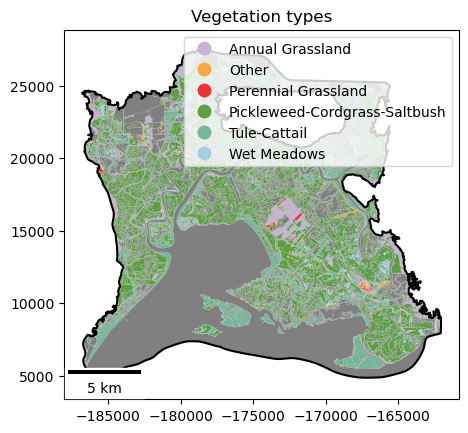

In [15]:
fig, ax = plt.subplots()
area.boundary.plot(ax=ax, color='black')
shp.plot(column='PFT', ax=ax, cmap=cmapp, legend=True)
shp2.plot(ax=ax, color='grey')
#area.boundary.plot(ax=ax, color='red')
#plt.tight_layout()
scalebar = ScaleBar(1, location='lower left')
plt.gca().add_artist(scalebar)
plt.title('Vegetation types')
#plt.savefig("figures/vegetationTypes.svg")

In [23]:
# dissolve all features of shp for masking general results
#shp_dis = shp.dissolve(by="PFT")
#shp_dis.head()

# create new column and reapeat label
#shp_dis["id"] = "All"
#shp_dis = shp_dis.dissolve(by="id")
#shp_dis.head()
shp_dis.to_crs('EPSG:32610').to_file("SHP/Suisun_mask.shp")

In [133]:
## generate random points inside polygons

from shapely.geometry import shape, Point
import numpy as np
import fiona

# shapefile and n_points
shapefile = "SHP/Suisun_PFT_diss_proj.shp"
n_points = 10

# Read in the shapefile using Fiona
with fiona.open(shapefile) as shapefile:
    polygons = [shape(pol['geometry']) for pol in shapefile]

# Create an empty list to store the random points
points = []

# Iterate through each polygon
for polygon in polygons:
    # Get the bounds of the polygon
    minx, miny, maxx, maxy = polygon.bounds
    # Generate random points within the bounds
    random_points = np.random.rand(n_points, 2)
    random_points[:,0] = random_points[:,0]*(maxx - minx) + minx
    random_points[:,1] = random_points[:,1]*(maxy - miny) + miny
    for point in random_points:
        if polygon.contains(Point(point)):
            points.append(point)

print(points)


[array([ 595946.32487696, 4218856.06043001]), array([ 587051.20161982, 4231709.93181372]), array([ 588084.24829027, 4222867.61636705]), array([ 583732.49745811, 4220167.53168554])]


In [134]:
len(points)

4

In [151]:
#def generate_random_points_in_shapefile(shapefile_path, n_points, output_file):
"""
Generates random points within the polygons of a shapefile.
:param shapefile_path: path to the shapefile
:param n_points: number of random points to generate within each polygon
:param output_file: path to the shapefile to be created
"""

shapefile_path="SHP/Suisun_PFT_diss_proj.shp"
n_points=10
output_file="SHP/random_points.shp"
    
import fiona

# Read in the shapefile using Fiona
with fiona.open(shapefile_path) as shapefile:
    polygons = [shape(pol['geometry']) for pol in shapefile]

# Create an empty list to store the random points
points = []

# Iterate through each polygon
for polygon in polygons:
    # Get the bounds of the polygon
    minx, miny, maxx, maxy = polygon.bounds
    # Generate random points within the bounds
    random_points = np.random.rand(n_points, 2)
    random_points[:,0] = random_points[:,0]*(maxx - minx) + minx
    random_points[:,1] = random_points[:,1]*(maxy - miny) + miny
    for point in random_points:
        if polygon.contains(Point(point[0], point[1])):
            points.append(point)
            
# Define the shapefile's properties
schema = {
    'geometry': 'Point',
    'properties': {'id': 'int'},
}

# Define the Coordinate Reference System (CRS)
crs = shapefile.crs

# Create a new shapefile with the points
with fiona.open(output_file, 'w', 'ESRI Shapefile', schema, crs=crs) as output:
    for i, point in enumerate(points):
        output.write({
            'geometry': mapping(Point(point[0], point[1]).__geo_interface__),
            'properties': {'id': i},
        })


AttributeError: 'dict' object has no attribute '__geo_interface__'

In [150]:
print(type(Point(point[0], point[1]).__geo_interface__))

<class 'dict'>


In [145]:
generate_random_points_in_shapefile("SHP/Suisun_PFT_diss_proj.shp", 10, "SHP/random_points.shp")

AttributeError: 'dict' object has no attribute '__geo_interface__'

In [142]:
import sys
from shapely.geometry import Point
import random
import geopandas as gpd
import numpy as np
import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm  # just for nice visualization

def random_points_in_polygon(shp, classNames, number=100, dist=10,
                             maxiter=1000, n_jobs=8):
    '''
    Generate random points inside polygons

    Parameters
    ----------
    - shp: String
            Absolute path to the input shapefile (multipolygon)
    - number: Integer
            Number of points to generate inside each polygon (class)
    - dist: Integer
            distance value of the stratified sampling in meters
            default = 10
    - maxiter: Integer
            Maximum number of iterations before exit. Usefull if the polygon size
            does not hold the selected 'number' of points due to 'dist'

    '''
    # read shapefile and get labels
    shp = gpd.read_file(shp)

    def my_function(j, shp):
        # ansilary funciton to be passed to the parallel processing
        polygon = shp.geometry[j]
        points = []
        min_x, min_y, max_x, max_y = polygon.bounds
        i = 0
        while len(points) < number:
            point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
            if polygon.contains(Point(point[0], point[1])):
                if i == 0:
                    points.append(point)
                if i != 0:
                    try:
                        points.append(point)
                        dist = [point.distance(x) for x in points][:-1]
                        # delete last point if distance to other points > dist
                        if np.any(np.array(dist) < dist):
                            points.pop()
                    except i > maxiter:
                        sys.exit(1)
            i += 1
        df = gpd.GeoDataFrame(crs=shp.crs, geometry=points)
        df['class'] = shp[classNames][j]
        return df

    # parallel processing through the list
    num_cores = multiprocessing.cpu_count()
    outlist = Parallel(n_jobs=num_cores)(delayed(my_function)(j, shp)
                                         for j in tqdm(range(len(shp))))

    return pd.concat(outlist)  # concatenate all data

In [143]:
random_points_in_polygon("SHP/Suisun_PFT_diss_proj.shp", 10)

100%|█████████████████████████████████████████| 11/11 [00:00<00:00, 6697.25it/s]


TypeError: 'Point' object is not subscriptable

In [125]:
print(shapefile.crs)

None


Text(0.5, 1.0, '')

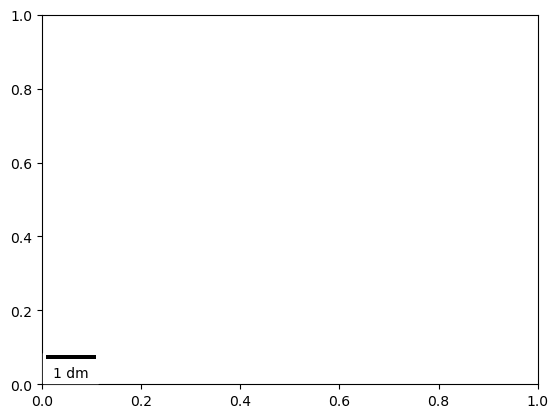

In [94]:
# plot sub areas
# subplot area 1
xmin = area.geometry.apply(mapping)[0]['coordinates'][0][0][0]
xmax = area.geometry.apply(mapping)[0]['coordinates'][0][1][0]
ymin = area.geometry.apply(mapping)[0]['coordinates'][0][2][1]
ymax = area.geometry.apply(mapping)[0]['coordinates'][0][0][1]

shp.plot(column='CalVegName', ax=ax, cmap=cmapp)
plt.tight_layout()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
scalebar = ScaleBar(1, location='lower left')
plt.gca().add_artist(scalebar)
plt.title('')
#plt.savefig('area1_class.png', dpi=400)

In [95]:
# subplot area 2
xmin = area.geometry.apply(mapping)[1]['coordinates'][0][0][0]
xmax = area.geometry.apply(mapping)[1]['coordinates'][0][1][0]
ymin = area.geometry.apply(mapping)[1]['coordinates'][0][2][1]
ymax = area.geometry.apply(mapping)[1]['coordinates'][0][0][1]

fig, ax = plt.subplots()
shp.plot(column='CalVegName', ax=ax, cmap=cmapp)
plt.tight_layout()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
scalebar = ScaleBar(1, location='lower left')
plt.gca().add_artist(scalebar)
plt.title('')
#plt.savefig('area2_class.png', dpi=400)

KeyError: 1

<AxesSubplot:>

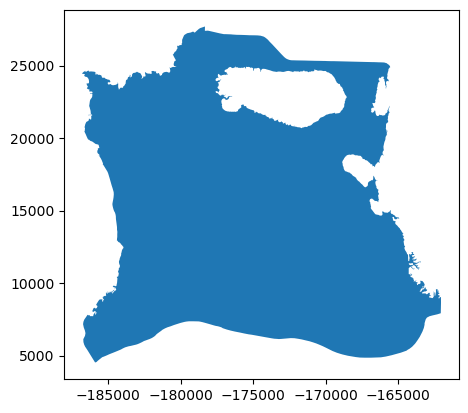

In [96]:
area.plot()


Text(0.5, 1.0, '')

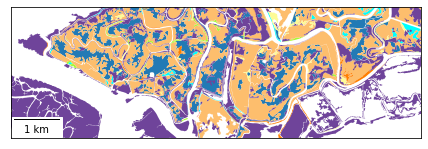

In [14]:
# subplot area 3
xmin = area.geometry.apply(mapping)[2]['coordinates'][0][0][0]
xmax = area.geometry.apply(mapping)[2]['coordinates'][0][1][0]
ymin = area.geometry.apply(mapping)[2]['coordinates'][0][2][1]
ymax = area.geometry.apply(mapping)[2]['coordinates'][0][0][1]

fig, ax = plt.subplots()
shp.plot(column='CalVegName', ax=ax, cmap=cmapp)
plt.tight_layout()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
scalebar = ScaleBar(1, location='lower left')
plt.gca().add_artist(scalebar)
plt.title('')
#plt.savefig('area3_class.png', dpi=400)

## %RMSE maps

In [91]:
rmse = xr.open_rasterio('lsp_norm.tif')
rmse.values[rmse.values == 0] = np.nan
#rmse.values = rmse.rio.interpolate_na() # interpolate NaN values

In [84]:
from sklearn.preprocessing import scale

rmse.values[0,:,:] = scale(rmse.values[0,:,:])
rmse.values[1,:,:] = scale(rmse.values[1,:,:])
rmse.values[2,:,:] = scale(rmse.values[2,:,:])

ras = rmse.values[0:3,:,:]

/home/javierlopatin/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/javierlopatin/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/home/javierlopatin/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/javierlopatin/miniconda3/lib/python3.8/site

In [93]:
rmse.rio.to_raster('lsp_norm.tif')

AttributeError: 'Rectangle' object has no property 'robust'

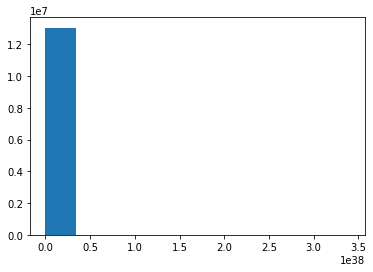

In [20]:
# plot full Suisun area
rmse.plot(robust=True, cmap=plt.cm.magma, cbar_kwargs={"label": "%"})
plt.title('%RMSE')
plt.ylabel('')
plt.xlabel('')
scalebar = ScaleBar(10, location='lower left')  # 1 pixel = 10 meter
plt.gca().add_artist(scalebar)
plt.tight_layout()
plt.show()
#plt.savefig('%RMSE.png', dpi=400)

In [67]:
# Zoom to example site
# clip raster
clipped1 = rmse.rio.clip([area.geometry.apply(mapping)[0]], rmse.rio.crs)
clipped2 = rmse.rio.clip([area.geometry.apply(mapping)[1]], rmse.rio.crs)
clipped3 = rmse.rio.clip([area.geometry.apply(mapping)[2]], rmse.rio.crs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


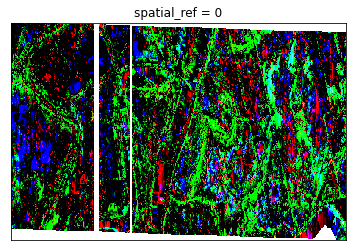

In [71]:
# plot
fig, ax = plt.subplots()
clipped1[1:4, :, :].plot.imshow(rgb='band')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#plt.savefig('RMSE_area1.png', dpi=400)

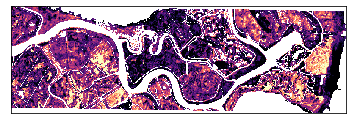

In [20]:
fig, ax = plt.subplots()
plt.imshow(clipped2.values[0, :, :], vmin=vmin, vmax=vmax, cmap=plt.cm.magma)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#plt.savefig('RMSE_area2.png', dpi=400)

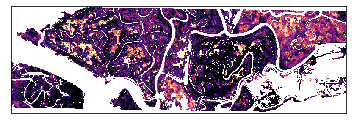

In [21]:
fig, ax = plt.subplots()
plt.imshow(clipped3.values[0, :, :], vmin=vmin, vmax=vmax, cmap=plt.cm.magma)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#plt.savefig('RMSE_area3.png', dpi=400)

## Example PhenoPlots

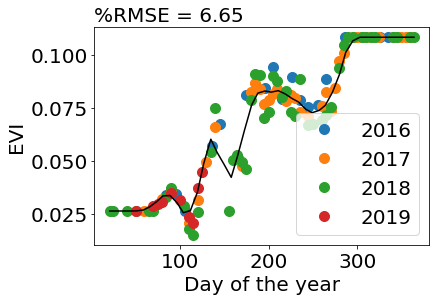

<Figure size 432x288 with 0 Axes>

In [22]:
X1, Y1 = 579825.218,4222682.012
fig, ax = plt.subplots(figsize=(6, 4))
phenopy.PhenoPlot(X=X1, Y=Y1, inData=inData1, dates=dates1, correctionValue=10000, 
                  nan_replace=-32767, nGS=46, fontsize=20, titlesize=20, legendsize=20,
                  labelsize=20, plotType=1, rollWindow=3, ylab='EVI')
plt.tight_layout()
#plt.savefig('phen_area1_1.svg')

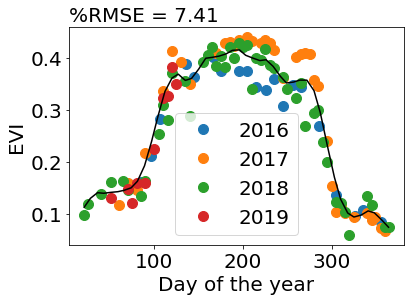

<Figure size 432x288 with 0 Axes>

In [28]:
X2, Y2 = 582730.674,4221828.921
fig = plt.subplots(figsize=(6, 4))
phenopy.PhenoPlot(X=X2, Y=Y2, inData=inData1, dates=dates1, correctionValue=10000, 
                  nan_replace=-32767, nGS=46, fontsize=20, titlesize=20, legendsize=20,
                  labelsize=20, plotType=1, rollWindow=3, ylab='EVI')
plt.tight_layout()
plt.savefig('phen_area1_2.png')

### Extraer valores de phenoShape, %RMSE, bandas por clase vegetacional

<AxesSubplot:>

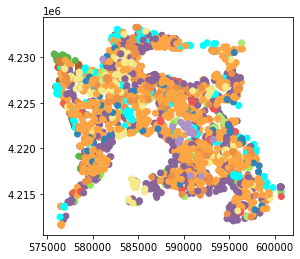

In [6]:
points = gpd.read_file('shapefiles/Points_classes.geojson')

# shapefile colors
cmapp = ['cyan', '#a6cee3', '#1f78b4', 'greenyellow', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f',
         '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', 'peru']

cmapp = pltc.LinearSegmentedColormap.from_list(points.CalVegName, cmapp)


points.plot(column='CalVegName', cmap=cmapp, legend=False)

In [97]:
# names of files
shp = 'shapefiles/Points_classes.geojson'
Nrmse = 'nRMSE_all_fill.tif'
phenoshape = 'TSS_phen_all.tif'
LSP = 'TSS_LSP_all.tif'
clusters = 'cluster_phen_all.tif'
dem = 'SuisunMarsh_2018_LEAN_DEM_1m_mm_USGS.tif'

In [98]:
# read number of shapefile points
points = gpd.read_file(shp)
length = points.length

DriverError: shapefiles/Points_classes.geojson: No such file or directory

In [14]:
def extract(shp, raster, num_cores = 6):
    import rasterio
    import numpy as np
    from rasterstats import point_query
    from joblib import Parallel, delayed
    from tqdm import tqdm
    import pandas as pd
    
    # read number of raster bands
    with rasterio.open(raster) as r:
        bands = r.count
    # create band names
    bandNames = []
    for i in range(bands):
        a = "B" + str(i+1)
        bandNames.append(a)
        
    # empty matrix to store results
    matrix = np.empty([len(length), bands+1], dtype=object)
    
    # Extract values
    def _funtion(i, shp, raster):
        stats = point_query(shp, raster, band=i+1)
        return pd.DataFrame(stats)
    # parallel processing
    stats = Parallel(n_jobs=num_cores)(delayed(_funtion)(i, shp, raster)
                                       for i in tqdm(range(len(bandNames))))
    # set the final data frame
    df = pd.concat(stats, axis=1)  # concatenate all dataframes into one
    df.columns = bandNames  # add colum names
    df.index = points['CalVegName']  # and shapefile ID to index
        
    return df

In [106]:
points_rmse       = extract(shp, Nrmse)
points_phenoshape = extract(shp, phenoshape)
points_LSP        = extract(shp, LSP)


100%|██████████| 4/4 [00:00<00:00, 2774.93it/s]

100%|██████████| 46/46 [05:02<00:00,  6.57s/it]

100%|██████████| 16/16 [00:27<00:00,  1.71s/it]


In [14]:
points_clusters       = extract(shp, clusters)

100%|██████████| 1/1 [00:00<00:00,  7.47it/s]


In [15]:
points_dem = extract(shp, dem)

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 556.79it/s]


In [16]:
points_dem.head()

,B1
CalVegName,
Tule-Cattail,1823.630475
Tule-Cattail,2054.107718
Tule-Cattail,2186.780158
Tule-Cattail,1661.128722
Tule-Cattail,-486.114810


In [109]:
# save as CSV
points_rmse.to_csv("points_rmse.csv", index=True, header=True, na_rep='NA')
points_phenoshape.to_csv("points_phenoshape.csv", index=True, header=True, na_rep='NA')
points_LSP.to_csv("points_LSP.csv", index=True, header=True, na_rep='NA')

In [17]:
points_clusters.to_csv("points_clusters.csv", index=True, header=True, na_rep='NA')

In [17]:
points_dem.to_csv("points_dem.csv", index=True, header=True, na_rep='NA')